In [2]:
from google.colab import files
upload=files.upload()

Saving Customer Churn.csv to Customer Churn.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Customer Churn.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
for col in ['tenure','MonthlyCharges','TotalCharges']:
  print(col,len(df[df[col]==" "]))
  print("-----------------------------")



tenure 0
-----------------------------
MonthlyCharges 0
-----------------------------
TotalCharges 11
-----------------------------


Replacing number of blank rows in TotalCharges as 0 since tenure is 0 corresponding to the blank rows

In [9]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
df['TotalCharges']=df['TotalCharges'].astype('float')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['customerID'].duplicated().sum()

0

Converting values of Senior citizen to 'yes' and 'no' for better clarity and understanding

In [12]:
def change(values):
  if values==1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(change)

In [13]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# To determine the number of churned customers

By frequency

<ipython-input-38-de04e316c9e5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ch_bar=sns.countplot(x=df['Churn'],data=df,palette='Set2',edgecolor='black')


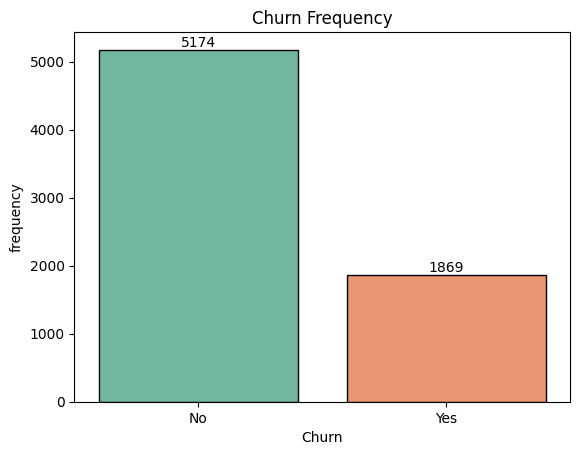

In [38]:
ch_bar=sns.countplot(x=df['Churn'],data=df,palette='Set2',edgecolor='black')
plt.ylabel('frequency')
plt.title('Churn Frequency')

for container in ch_bar.containers:
  ch_bar.bar_label(container)

By percentage

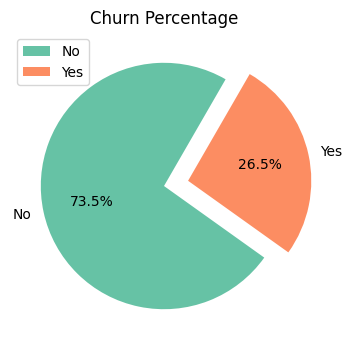

In [20]:
plt.figure(figsize=(4,4))
ch_pie=df.groupby('Churn').agg({'Churn':'count'})
colors = sns.color_palette("Set2")
plt.pie(ch_pie['Churn'],labels=ch_pie.index,explode=(0,0.2),autopct='%1.1f%%',startangle=60,colors=colors)
plt.title('Churn Percentage')
plt.legend()



Over 26.5%(1869 nos) of total customers have churned out.

 # How each of the factors considered influence Customer Churn?

#1. By gender

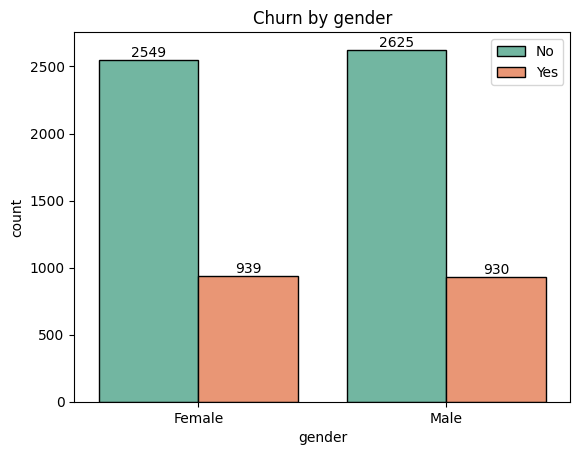

In [21]:
ge=sns.countplot(x=df['gender'],data=df,hue='Churn',edgecolor='black',palette='Set2')
plt.title('Churn by gender')
plt.legend(loc='upper right')

for container in ge.containers:
  ge.bar_label(container)


From the above graph, an almost equal number of male and female customers have churned, indicating that gender has no significant influence on the customer churn rate.

#2. Senior Citizen

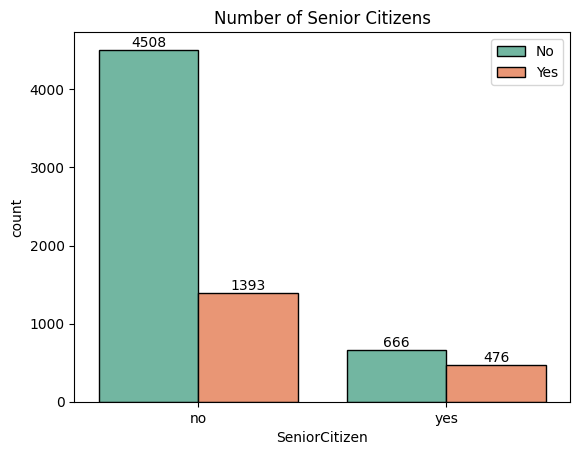

In [22]:
sc=sns.countplot(x=df['SeniorCitizen'],data=df,edgecolor='black',hue='Churn',palette='Set2')
plt.title("Number of Senior Citizens")
plt.legend()
for container in sc.containers:
  sc.bar_label(container)

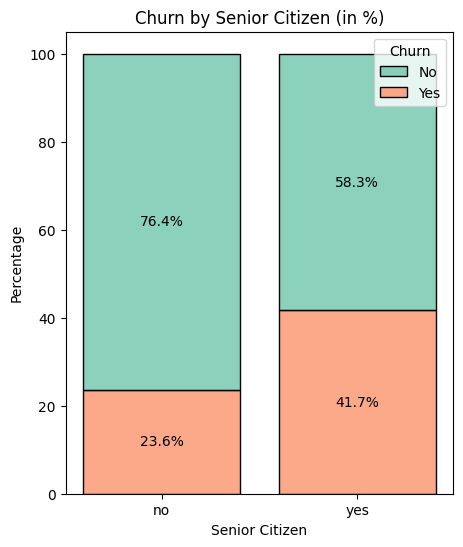

In [23]:
# Normalize counts to get percentages
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
df_total = df_grouped.groupby('SeniorCitizen')['Count'].transform('sum')
df_grouped['Percentage'] = df_grouped['Count'] / df_total * 100

# Plot stacked bar chart
plt.figure(figsize=(5, 6))
sc = sns.histplot(
    data=df_grouped,
    x='SeniorCitizen',
    weights='Percentage',
    hue='Churn',
    multiple='stack',
    shrink=0.8,palette='Set2'
)

# Add percentage labels on bars
for container in sc.containers:
    sc.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10)

plt.title("Churn by Senior Citizen (in %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.show()


Out of the total customers (1142 nos) in the Senior Citizen Category, a considerable amount (41.7%) of customers have churned out.

#3. Tenure

Text(0.5, 1.0, 'Customer Churn by tenure')

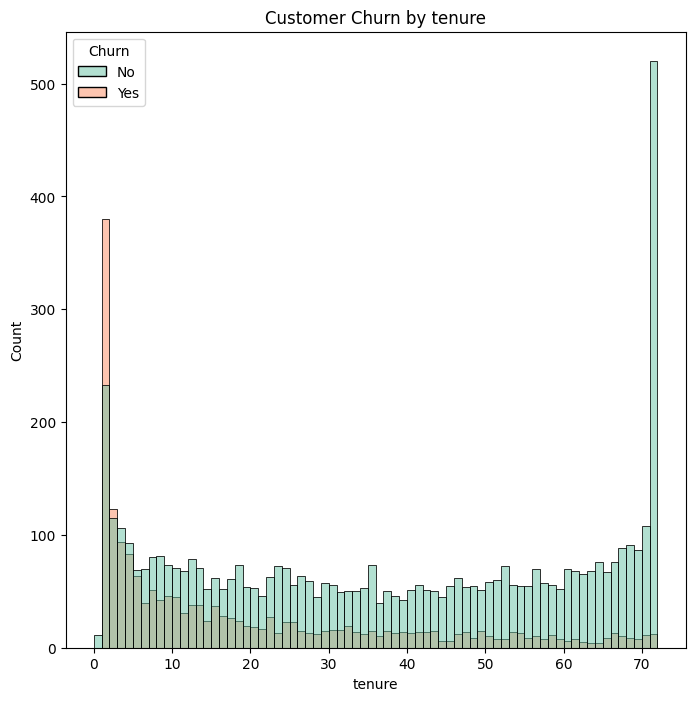

In [24]:
plt.figure(figsize=(8,8))
sns.histplot(x='tenure',data=df,bins=72,hue="Churn",palette='Set2')
plt.title("Customer Churn by tenure")

**From** the above graph, it can be observed that the majority of customers who have used the service for a short period (usually 2-3 months) have churned, whereas customers who have used the service for a longer period (around 72 months) have been retained



# 4.By Contract

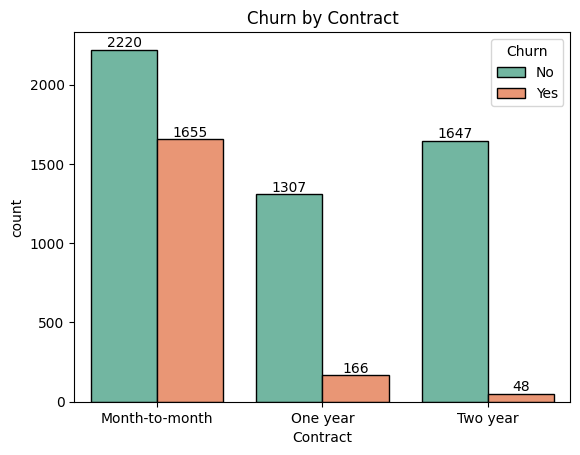

In [25]:
ct=sns.countplot(x=df['Contract'],data=df,hue='Churn',edgecolor='black',palette='Set2')
plt.title('Churn by Contract')


for container in ct.containers:
  ct.bar_label(container)

Most of the customers who adopt a month-to-month contract are more likely to churn compared to those who adopt longer-term contracts, who have a lower churn rate.









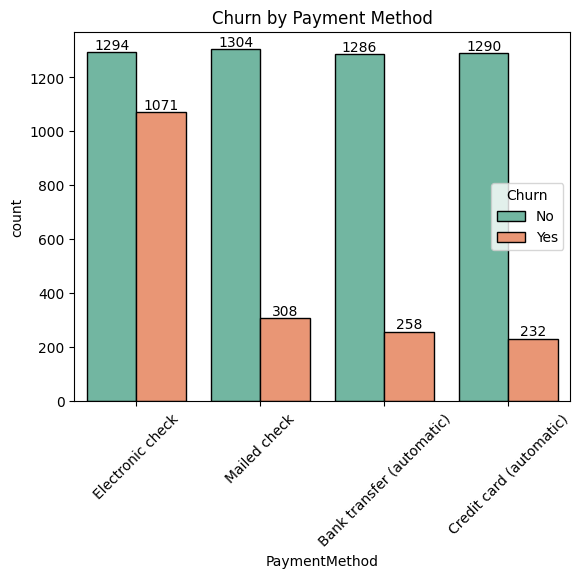

In [36]:
pay=sns.countplot(x=df['PaymentMethod'],data=df,hue='Churn',palette='Set2',edgecolor='black')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)

for container in pay.containers:
  pay.bar_label(container)

Customers who use electronic checks as their payment method are more likely to churn compared to those using other payment methods.









Other factors

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

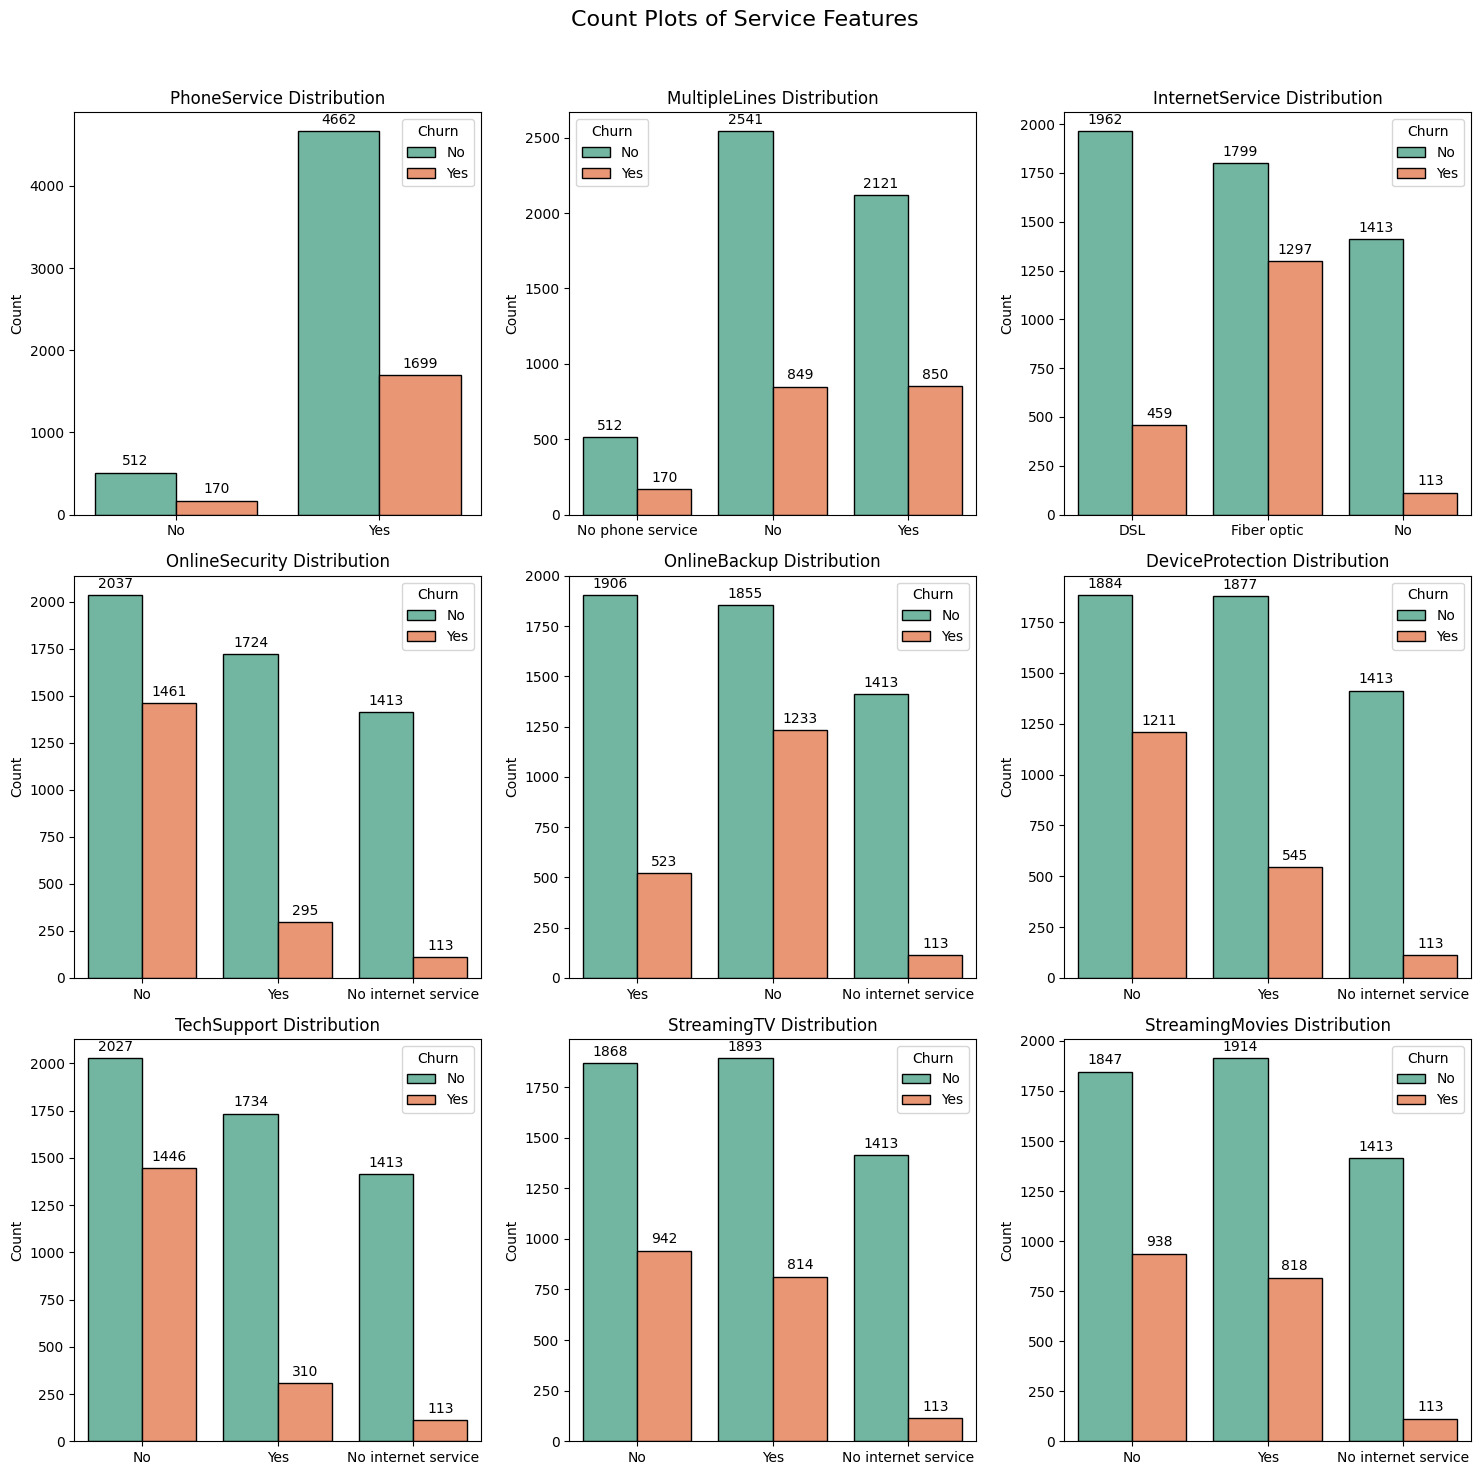

<Figure size 640x480 with 0 Axes>

In [ ]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Count Plots of Service Features", fontsize=16)

# Loop through columns and create count plots with labels
for ax, col in zip(axes.flatten(), columns):
    sc = sns.countplot(x=df[col], data=df, ax=ax, palette="Set2",hue=df['Churn'],edgecolor='black')
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel("")  # Remove x-axis label for cleaner look
    ax.set_ylabel("Count")

    # Add labels on bars
    for container in sc.containers:
        sc.bar_label(container, fmt='%d', label_type="edge", fontsize=10, padding=3)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit title
plt.show()

plt.savefig('Count Plots of Service Features.pdf')


The count plots show the relationship between customer churn and various service features. Customers who do not have additional services like Online Security, Tech Support, or Device Protection tend to churn more, indicating that these features might help in retaining customers. Fiber optic internet users have a noticeably higher churn rate compared to DSL users, suggesting potential service or pricing issues. Customers with StreamingTV and StreamingMovies services also show a relatively higher churn rate, which could indicate dissatisfaction with bundled services. Multiple lines and phone service do not seem to have a strong correlation with churn. Overall, customers who have fewer additional services tend to churn more, highlighting the importance of upselling valuable services to improve retention.

# Distribution of numerical data

In [28]:
def plot_distribution(df,column_name):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.histplot(df[column_name],kde='True')
  plt.title(f"Distribution of {column_name}")

  col_mean=df[column_name].mean()
  col_median=df[column_name].median()
  plt.axvline(col_mean,color='red',linestyle='dashed',label='Mean')
  plt.axvline(col_median,color='blue',linestyle='dashed',label='Median')

  plt.legend()

  plt.subplot(1,2,2)
  sns.boxplot(y=df[column_name])
  plt.title(f'Boxplot of {column_name}')
  plt.show()

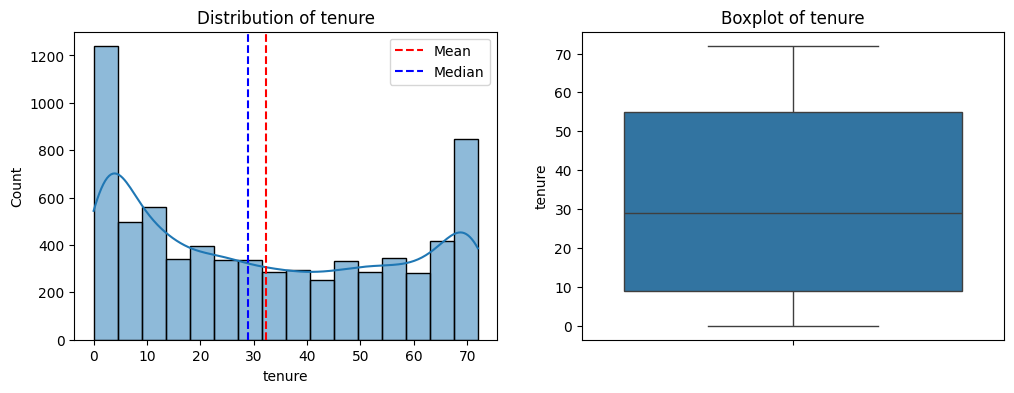

In [ ]:
plot_distribution(df,'tenure')

The tenure distribution in customer churn data is right-skewed, indicating that most customers leave within the first few months, while a smaller group stays much longer.
The average (mean) tenure is higher than the middle value (median), meaning a few long-term customers increase the average. The boxplot shows a wide range of tenures, with some customers staying much longer than others.

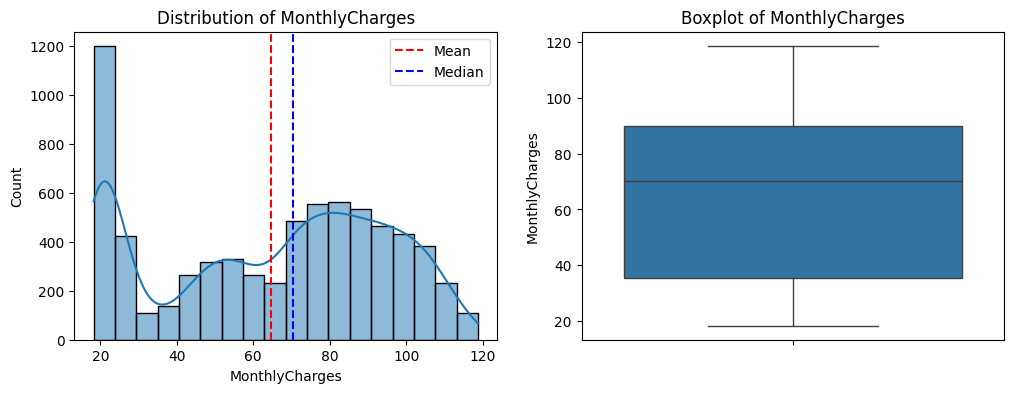

In [ ]:
plot_distribution(df,'MonthlyCharges')

The distribution of monthly charges shows two peaks, suggesting that customers are grouped into lower and higher pricing categories. The mean (red dashed line) is slightly higher than the median (blue dashed line), indicating that some customers with very high charges pull the average up. The boxplot confirms a wide range of charges, with no extreme outliers, meaning most customers fall within a reasonable price range.

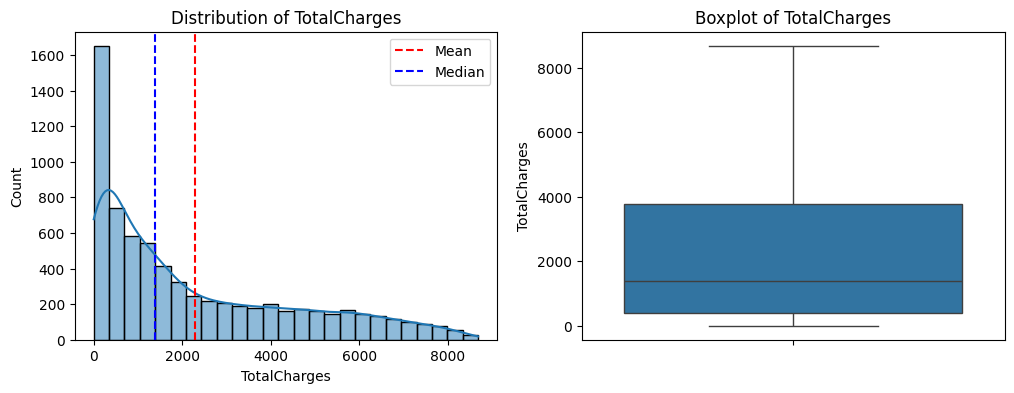

In [ ]:
plot_distribution(df,'TotalCharges')

The Total Charges distribution is right-skewed, meaning most customers have lower total charges, while a few have very high charges. The mean (red line) is higher than the median (blue line), showing that a small group of high-paying customers increases the average. The boxplot confirms this pattern, with a long upper whisker indicating some customers have significantly higher total charges.









<ipython-input-29-ab6f7b51a55f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")


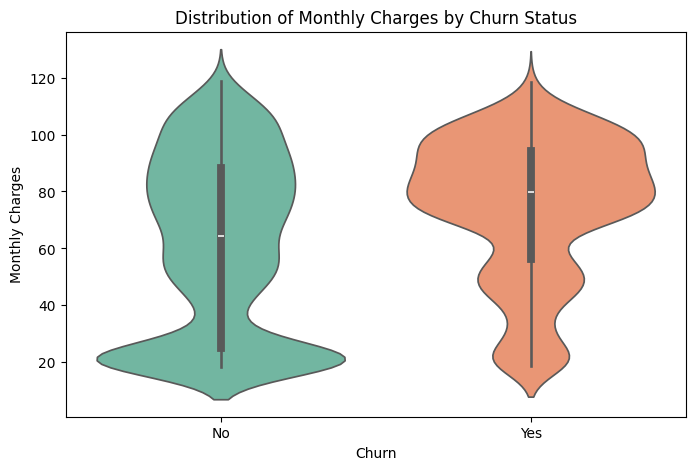

In [29]:
# Create a violin plot for MonthlyCharges based on Churn status
plt.figure(figsize=(8, 5))
sns.violinplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")

# Set labels and title
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.title("Distribution of Monthly Charges by Churn Status")

# Show the plot
plt.show()

The violin plot shows that customers who churned tend to have higher Monthly Charges compared to those who stayed. The distribution for churned customers is more concentrated around higher values (above 60), while non-churned customers have a wider spread, including a significant portion with lower charges. This suggests that higher Monthly Charges may be linked to higher churn rates.

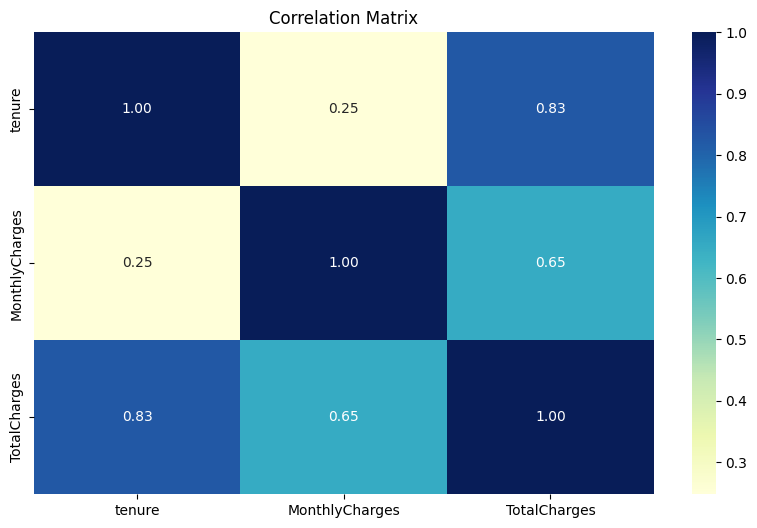

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From the above matrix, we can say that tenure and total charges are positively related since their value is 0.83 which is in between 0 and 1

#CONCLUSION

The analysis of telecom customer churn reveals key patterns affecting retention.

 A significant proportion of customers have churned, with senior citizens and monthly contract holders showing higher churn rates.
Customers with higher monthly charges tend to leave, while those with lower total charges indicate early departures.
Service-related factors also play a role—customers without tech support or online security services exhibit higher churn, and fiber optic users experience more turnover, possibly due to pricing or service quality issues.

To address these challenges, telecom companies should promote long-term contracts through discounts or bundled services, enhance customer support to engage at-risk customers, and closely monitor high-risk segments like senior citizens and short-tenure customers. Data-driven strategies, such as personalized retention offers and proactive engagement, can help improve customer loyalty and reduce churn effectively.